# Grand Hospitality Analysis ( Problem Statement )

AtliQ Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, AtliQ Grands are losing its market share and revenue in the luxury/business hotels category. As a strategic move, the managing director of AtliQ Grands wanted to incorporate “Business and Data Intelligence” to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights.

Their revenue management team had decided to hire a 3rd party service provider to provide them with insights from their historical data.

Task:

You are a data analyst who has been provided with sample data to work on the following task. You can download all relevant documents from the download section. Create relevant insights

## Data Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### importing Data from CSV

In [2]:
date_df = pd.read_csv(r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\dim_date.csv")
hotels_df = pd.read_csv(r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\dim_hotels.csv")
rooms_df = pd.read_csv(r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\dim_rooms.csv")
fact_agg_booking = pd.read_csv (r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\fact_aggregated_bookings.csv")
fact_booking = pd.read_csv (r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\fact_bookings.csv")                           

In [3]:
# Checking 
date_df.head()

,date,mmm yy,week no,day_type
0,1-May-22,22-May,W 19,weekend
1,2-May-22,22-May,W 19,weekeday
2,3-May-22,22-May,W 19,weekeday
3,4-May-22,22-May,W 19,weekeday
4,5-May-22,22-May,W 19,weekeday


In [4]:
date_df.tail()

,date,mmm yy,week no,day_type
87,27-Jul-22,22-Jul,W 31,weekeday
88,28-Jul-22,22-Jul,W 31,weekeday
89,29-Jul-22,22-Jul,W 31,weekeday
90,30-Jul-22,22-Jul,W 31,weekend
91,31-Jul-22,22-Jul,W 32,weekend


In [5]:
date_df.shape

(92, 4)

In [6]:
hotels_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [7]:
hotels_df.tail()

,property_id,property_name,category,city
20,19560,Atliq City,Business,Bangalore
21,19561,Atliq Blu,Luxury,Bangalore
22,19562,Atliq Bay,Luxury,Bangalore
23,19563,Atliq Palace,Business,Bangalore
24,17564,Atliq Seasons,Business,Mumbai


In [8]:
hotels_df.shape

(25, 4)

In [9]:
rooms_df.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [10]:
rooms_df.tail()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [11]:
rooms_df.shape

(4, 2)

In [12]:
fact_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [13]:
fact_agg_booking.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0
9199,17561,31-Jul-22,RT4,3,4.0


In [14]:
fact_agg_booking.shape

(9200, 5)

In [15]:
fact_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [16]:
fact_booking.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [17]:
fact_booking.shape

(134590, 12)

In [18]:
fact_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [19]:
# Room Categoryes

fact_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [20]:
# Name of platform use for bookings

fact_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [21]:
# Finding out how many bookings done in each platform

fact_booking.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

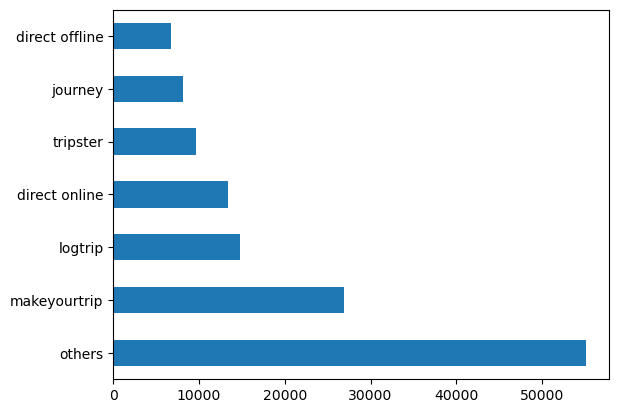

In [22]:
fact_booking.booking_platform.value_counts().plot(kind="barh")

In [23]:
fact_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


# Data Clening 

In [24]:
fact_booking[fact_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
fact_booking.shape

(134590, 12)

In [26]:
# Data Cleaning: Remove records with negative number of guests

fact_booking = fact_booking[fact_booking.no_guests>0]

In [27]:
# Display the number of rows removed

print(fact_booking)

               booking_id  property_id booking_date check_in_date  \
1        May012216558RT12        16558     30-04-22      1/5/2022   
2        May012216558RT13        16558     28-04-22      1/5/2022   
4        May012216558RT15        16558     27-04-22      1/5/2022   
5        May012216558RT16        16558     1/5/2022      1/5/2022   
6        May012216558RT17        16558     28-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134584   Jul312217564RT45        17564     30-07-22      31-07-22   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
1           2/5/2022        2.0           RT1           others            NaN   
2        

In [28]:
fact_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


### Outlier removal in revenue generated

In [29]:
fact_booking.revenue_generated.min(),fact_booking.revenue_generated.max()

(6500, 28560000)

In [30]:
# Calculate mean and standard deviation
avg_revenue = fact_booking['revenue_generated'].mean()
std_revenue = fact_booking['revenue_generated'].std()

In [31]:
print(avg_revenue)
print(std_revenue)

15378.036937686695
93040.15493143328


In [32]:
# Set the threshold for outliers (3 standard deviations)
std_threshold = 3

# Calculate upper and lower limits
upper_limit = avg_revenue + std_threshold * std_revenue
lower_limit = avg_revenue - std_threshold * std_revenue

print(upper_limit)
print(lower_limit)

294498.50173198653
-263742.4278566132


In [33]:
# Identify and print outliers
outliers = fact_booking[(fact_booking['revenue_generated'] > upper_limit) | (fact_booking['revenue_generated'] < lower_limit)]
print("Outliers:")
print(outliers)

Outliers:
               booking_id  property_id booking_date check_in_date  \
2        May012216558RT13        16558     28-04-22      1/5/2022   
111      May012216559RT32        16559     29-04-22      1/5/2022   
315      May012216562RT22        16562     28-04-22      1/5/2022   
562     May012217559RT118        17559     26-04-22      1/5/2022   
129176   Jul282216562RT26        16562     21-07-22      28-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
2           4/5/2022        2.0           RT1          logtrip            5.0   
111         2/5/2022        6.0           RT3    direct online            NaN   
315         4/5/2022        2.0           RT2   direct offline            3.0   
562         2/5/2022        2.0           RT1           others            NaN   
129176      29-07-22        2.0           RT2    direct online            3.0   

       booking_status  revenue_generated  revenue_realized  
2         Checked Out      

In [34]:
# Remove outliers from the DataFrame

fact_booking_no_outliers = fact_booking[(fact_booking['revenue_generated'] <= upper_limit) & (fact_booking['revenue_generated'] >= lower_limit)]
print(fact_booking_no_outliers)

               booking_id  property_id booking_date check_in_date  \
1        May012216558RT12        16558     30-04-22      1/5/2022   
4        May012216558RT15        16558     27-04-22      1/5/2022   
5        May012216558RT16        16558     1/5/2022      1/5/2022   
6        May012216558RT17        16558     28-04-22      1/5/2022   
7        May012216558RT18        16558     26-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134584   Jul312217564RT45        17564     30-07-22      31-07-22   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
1           2/5/2022        2.0           RT1           others            NaN   
4        

In [35]:
fact_booking[fact_booking.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [36]:
fact_booking.revenue_realized.describe()  

count    134578.000000
mean      12696.011822
std        6927.841641
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [37]:
# Calculate mean and standard deviation

avg_revenue = fact_booking['revenue_realized'].mean()
std_revenue = fact_booking['revenue_realized'].std()

In [38]:
higher_limit = fact_booking.revenue_realized.mean() + 3*fact_booking.revenue_realized.std()
higher_limit

33479.53674501789

In [39]:
fact_booking[fact_booking.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [40]:
fact_booking[fact_booking.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [41]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

### removing null values in aggregate booking

In [42]:
fact_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [43]:
fact_agg_booking[fact_agg_booking.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [44]:
fact_agg_booking.capacity.median()

25.0

In [45]:
fact_agg_booking.capacity.fillna(fact_agg_booking.capacity.median(),inplace=True)

In [46]:
fact_agg_booking.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


# DATA TRANSFORMATION

#### Create occupancy percentage column

In [47]:
fact_agg_booking["occ_pct"] = (fact_agg_booking["successful_bookings"] / fact_agg_booking["capacity"])
fact_agg_booking["occ_pct"].fillna(0, inplace=True)


In [48]:
fact_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [49]:
fact_agg_booking["occ_pct"] = fact_agg_booking["occ_pct"].apply(lambda x : round(x*100, 2))
fact_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


### INSIGHTS GENERATION

In [50]:
fact_agg_booking.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

### Revenue, Occupancy %, and Average Rating Cards

In [51]:
# Revenue Card
total_revenue = fact_booking['revenue_generated'].sum()
print(f"Total Revenue: {total_revenue} Million")

# Occupancy % Card
overall_occupancy = fact_agg_booking['successful_bookings'].sum() / fact_agg_booking['capacity'].sum() * 100
print(f"Overall Occupancy: {overall_occupancy}%")

# Average Rating Card
average_rating = fact_booking['ratings_given'].mean()
print(f"Average Rating: {average_rating}")


Total Revenue: 2069545455 Million
Overall Occupancy: 57.97274056238714%
Average Rating: 3.619047619047619


In [52]:
df=pd.merge(fact_agg_booking,rooms_df,left_on="room_category",right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [53]:
df.drop("room_id",axis=1,inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [54]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

### Print average occupancy rate per city

In [55]:
hotels_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [56]:
df=pd.merge(df,hotels_df,on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


<Axes: xlabel='city'>

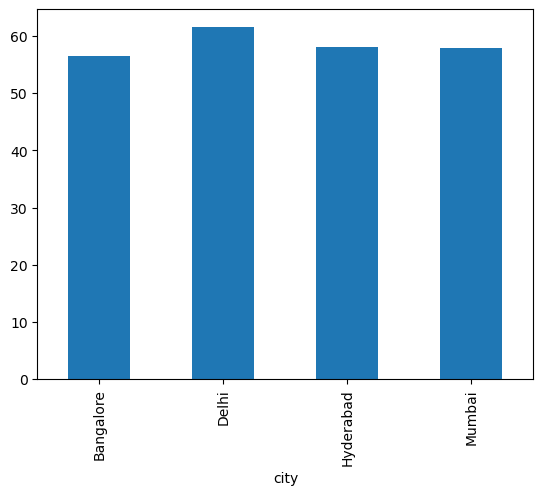

In [57]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

In [58]:
date_df

,date,mmm yy,week no,day_type
0,1-May-22,22-May,W 19,weekend
1,2-May-22,22-May,W 19,weekeday
2,3-May-22,22-May,W 19,weekeday
3,4-May-22,22-May,W 19,weekeday
4,5-May-22,22-May,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,22-Jul,W 31,weekeday
88,28-Jul-22,22-Jul,W 31,weekeday
89,29-Jul-22,22-Jul,W 31,weekeday
90,30-Jul-22,22-Jul,W 31,weekend


In [59]:
df = pd.merge(df,date_df,left_on="check_in_date",right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,1-May-22,22-May,W 19,weekend
1,16559,1-May-22,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,1-May-22,22-May,W 19,weekend
2,16559,1-May-22,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,1-May-22,22-May,W 19,weekend
3,16559,1-May-22,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,1-May-22,22-May,W 19,weekend
4,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,1-May-22,22-May,W 19,weekend


In [60]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

<Axes: xlabel='day_type'>

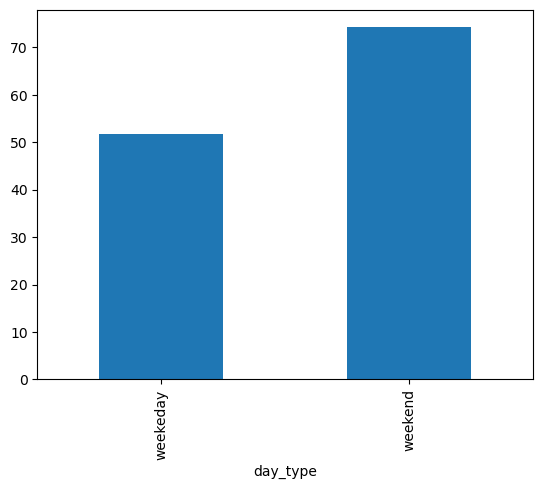

In [61]:
df.groupby("day_type")["occ_pct"].mean().round(2).plot(kind="bar")

### Print revenue realized per city

In [62]:
fact_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [63]:
hotels_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [64]:

# Merge dataframes to get City and Property information in fact_booking
all_bookings_Df = pd.merge(fact_booking, hotels_df, on='property_id')


In [65]:
# Group by City and calculate total revenue realized
all_bookings_Df.groupby('city')['revenue_realized'].sum().reset_index()

,city,revenue_realized
0,Bangalore,420383550
1,Delhi,294438788
2,Hyderabad,325179310
3,Mumbai,668602231


In [66]:
all_bookings_Df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
2,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
3,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
4,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


### Print month by month revenue

In [67]:
fact_booking['booking_date'] = pd.to_datetime(fact_booking['booking_date'])

# Merge dataframes
merged_data = pd.merge(fact_booking, hotels_df, on='property_id')

# Group by month and calculate total revenue realized
monthly_revenue = merged_data.groupby(merged_data['booking_date'].dt.to_period("M"))['revenue_realized'].sum().reset_index()

# Display month-by-month revenue
print("Month-by-Month Revenue:")
print(monthly_revenue)

Month-by-Month Revenue:
   booking_date  revenue_realized
0       2022-01          58135175
1       2022-02          57302457
2       2022-03          58882872
3       2022-04         126852494
4       2022-05         398286993
5       2022-06         390123323
6       2022-07         326173521
7       2022-08          60738374
8       2022-09          57988470
9       2022-10          60088637
10      2022-11          57448438
11      2022-12          56583125


### Print revenue realized per hotel type

In [68]:

# Merge dataframes to get Hotel Type information in fact_booking
merged_data = pd.merge(fact_booking, hotels_df[['property_id', 'category']], on='property_id')

# Group by Hotel Type and calculate total revenue realized
revenue_per_hotel_type = merged_data.groupby('category')['revenue_realized'].sum().reset_index()

# Display revenue realized per hotel type
print("Revenue Realized per Hotel Type:")
print(revenue_per_hotel_type)


Revenue Realized per Hotel Type:
   category  revenue_realized
0  Business         655967037
1    Luxury        1052636842


### Print average rating per city

In [69]:
# Merge dataframes to get City and Property information in fact_booking
merged_data = pd.merge(fact_booking, hotels_df, on='property_id')

# Group by City and calculate average rating
average_rating_per_city = merged_data.groupby('city')['ratings_given'].mean().reset_index()

# Display average rating per city
print("Average Rating per City:")
print(average_rating_per_city)


Average Rating per City:
        city  ratings_given
0  Bangalore       3.407681
1      Delhi       3.779265
2  Hyderabad       3.661041
3     Mumbai       3.650545


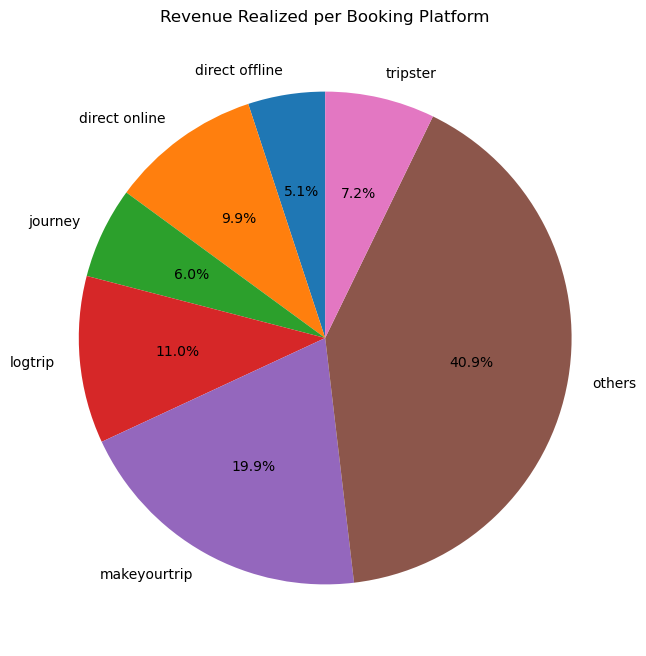

In [70]:
import matplotlib.pyplot as plt

# Merge dataframes to get City and Property information in fact_booking
merged_data = pd.merge(fact_booking, hotels_df, on='property_id')

# Group by Booking Platform and calculate total revenue realized
revenue_per_platform = merged_data.groupby('booking_platform')['revenue_realized'].sum().reset_index()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_per_platform['revenue_realized'], labels=revenue_per_platform['booking_platform'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Realized per Booking Platform')
plt.show()


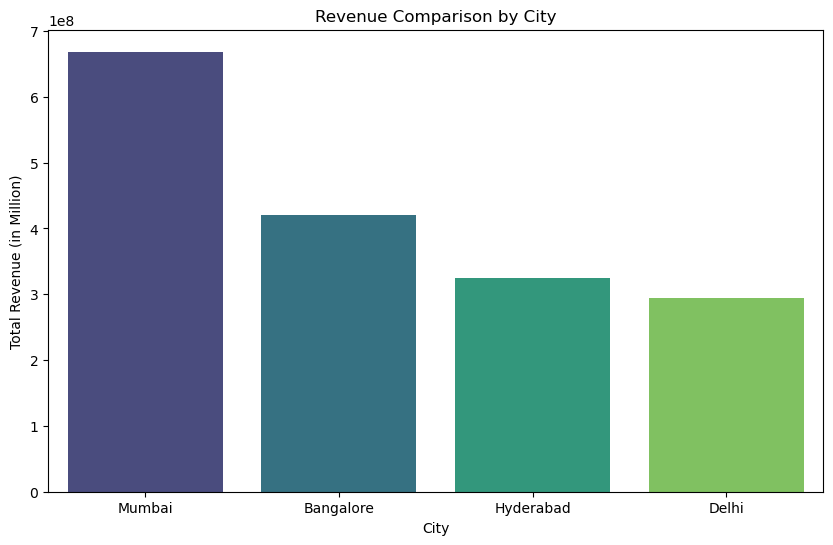

In [71]:
import seaborn as sns

# Merge dataframes to get City and Property information in fact_booking
merged_data = pd.merge(fact_booking_no_outliers, hotels_df, on='property_id')

# Group by City and calculate total revenue realized
revenue_by_city = merged_data.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_city.index, y=revenue_by_city.values, palette="viridis")
plt.title('Revenue Comparison by City')
plt.xlabel('City')
plt.ylabel('Total Revenue (in Million)')
plt.show()


# Filters by properties, city, status, platform, month and week.

In [72]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


### Properties

In [73]:
merged_data['property_name'].value_counts()

Atliq Palace     23625
Atliq Exotica    23438
Atliq City       23322
Atliq Blu        21794
Atliq Bay        21384
Atliq Grands     17029
Atliq Seasons     3981
Name: property_name, dtype: int64

In [74]:
property_grp=merged_data.groupby("property_name")

In [75]:
property_grp.get_group("Atliq Palace")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
24413,May012216563RT11,16563,30-04-22,1/5/2022,2/5/2022,1.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Palace,Business,Delhi
24414,May012216563RT12,16563,27-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Palace,Business,Delhi
24415,May012216563RT13,16563,30-04-22,1/5/2022,3/5/2022,3.0,RT1,others,4.0,Checked Out,10010,10010,Atliq Palace,Business,Delhi
24416,May012216563RT14,16563,28-04-22,1/5/2022,2/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Palace,Business,Delhi
24417,May012216563RT15,16563,30-04-22,1/5/2022,2/5/2022,1.0,RT1,others,NaN,Checked Out,9100,9100,Atliq Palace,Business,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130587,Jul312219563RT319,19563,30-07-22,31-07-22,1/8/2022,1.0,RT3,logtrip,3.0,Checked Out,18000,18000,Atliq Palace,Business,Bangalore
130588,Jul312219563RT320,19563,30-07-22,31-07-22,1/8/2022,2.0,RT3,others,NaN,Cancelled,18000,7200,Atliq Palace,Business,Bangalore
130589,Jul312219563RT41,19563,28-07-22,31-07-22,4/8/2022,1.0,RT4,journey,1.0,Checked Out,28500,28500,Atliq Palace,Business,Bangalore
130590,Jul312219563RT42,19563,31-07-22,31-07-22,2/8/2022,1.0,RT4,others,NaN,Checked Out,28500,28500,Atliq Palace,Business,Bangalore


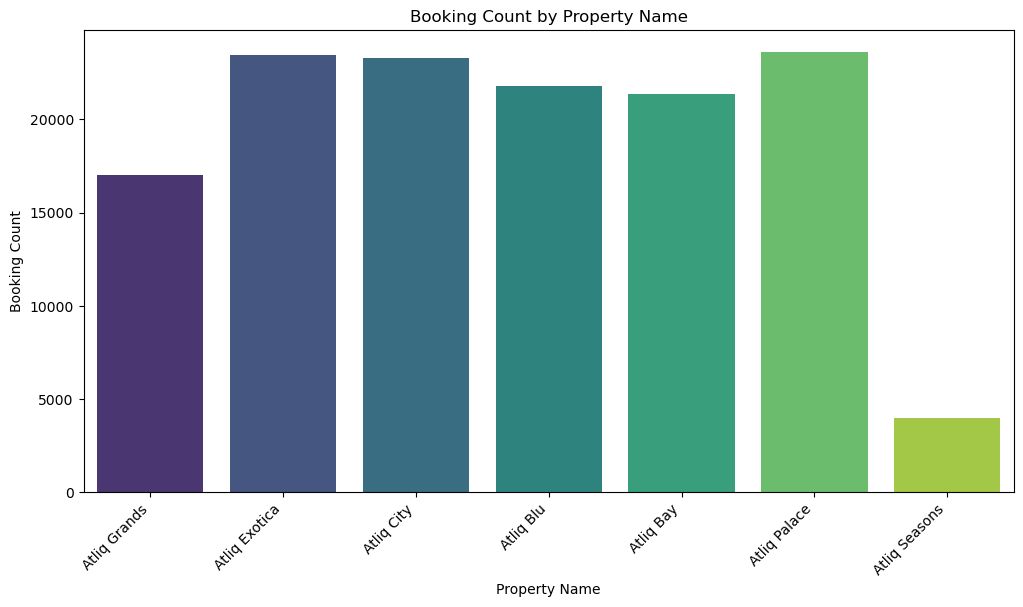

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x=merged_data['property_name'],palette='viridis')
plt.title('Booking Count by Property Name')
plt.xlabel('Property Name')
plt.ylabel('Booking Count')
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels for better visibility
plt.show()

### City

In [77]:
merged_data['city'].value_counts()

Mumbai       43452
Hyderabad    34883
Bangalore    32015
Delhi        24223
Name: city, dtype: int64

In [78]:
city_grp=merged_data.groupby("city")

In [79]:
city_grp.get_group("Mumbai")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
3147,May012216559RT11,16559,28-04-22,1/5/2022,3/5/2022,2.0,RT1,journey,3.0,Checked Out,11050,11050,Atliq Exotica,Luxury,Mumbai
3148,May012216559RT12,16559,29-04-22,1/5/2022,6/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,11050,11050,Atliq Exotica,Luxury,Mumbai
3149,May012216559RT13,16559,27-04-22,1/5/2022,2/5/2022,1.0,RT1,tripster,NaN,Cancelled,11050,4420,Atliq Exotica,Luxury,Mumbai
3150,May012216559RT14,16559,29-04-22,1/5/2022,3/5/2022,3.0,RT1,direct offline,5.0,Checked Out,12155,12155,Atliq Exotica,Luxury,Mumbai
3151,May012216559RT15,16559,29-04-22,1/5/2022,2/5/2022,3.0,RT1,others,5.0,Checked Out,12155,12155,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


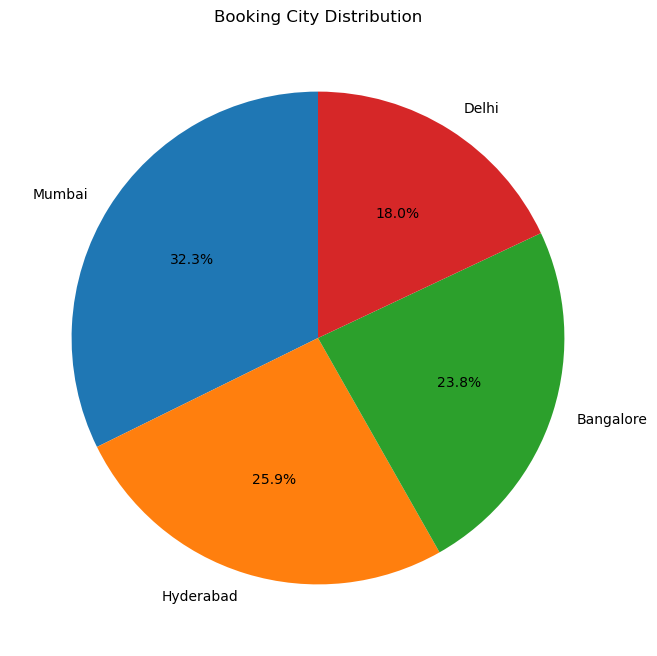

In [80]:
city_counts = merged_data['city'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking City Distribution')
plt.show()


## status

In [81]:
merged_data['booking_status'].value_counts()

Checked Out    94399
Cancelled      33416
No Show         6758
Name: booking_status, dtype: int64

In [82]:
booking_status_grp=merged_data.groupby("booking_status")

In [83]:
booking_status_grp.get_group("Cancelled")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
10,May012216558RT114,16558,30-04-22,1/5/2022,5/5/2022,1.0,RT1,logtrip,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
18,May012216558RT24,16558,29-04-22,1/5/2022,3/5/2022,3.0,RT2,others,NaN,Cancelled,13860,5544,Atliq Grands,Luxury,Delhi
19,May012216558RT25,16558,26-04-22,1/5/2022,2/5/2022,1.0,RT2,direct offline,NaN,Cancelled,12600,5040,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134552,Jul312217564RT219,17564,29-07-22,31-07-22,1/8/2022,2.0,RT2,others,NaN,Cancelled,15300,6120,Atliq Seasons,Business,Mumbai
134554,Jul312217564RT32,17564,31-07-22,31-07-22,3/8/2022,4.0,RT3,journey,NaN,Cancelled,24480,9792,Atliq Seasons,Business,Mumbai
134567,Jul312217564RT44,17564,31-07-22,31-07-22,1/8/2022,1.0,RT4,others,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai


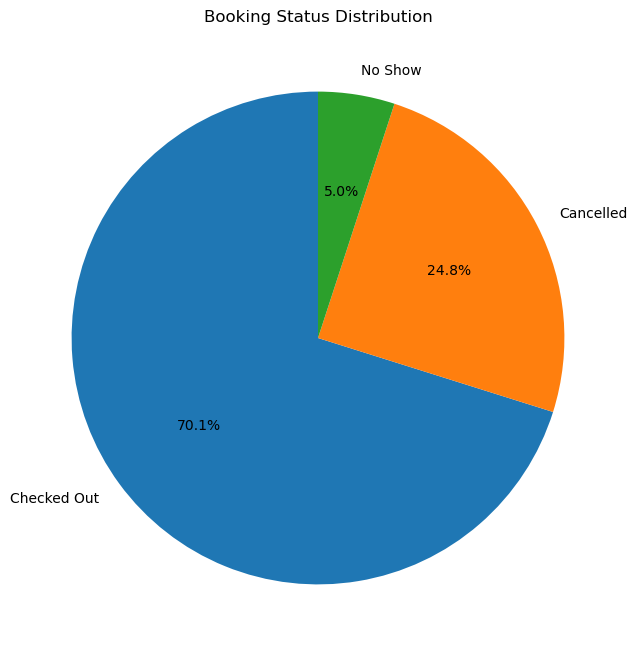

In [84]:
booking_status_counts = merged_data['booking_status'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking Status Distribution')
plt.show()

### month

In [85]:
merged_data.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests            float64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
property_name         object
category              object
city                  object
dtype: object

In [86]:
import datetime 
from datetime import datetime as dt

In [87]:
import pandas as pd

# Assuming merged_data is your DataFrame
merged_data[["check_in_date", "booking_date", "checkout_date"]] = merged_data[["check_in_date", "booking_date", "checkout_date"]].apply(pd.to_datetime)


In [88]:
merged_data.dtypes

booking_id                   object
property_id                   int64
booking_date         datetime64[ns]
check_in_date        datetime64[ns]
checkout_date        datetime64[ns]
no_guests                   float64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
property_name                object
category                     object
city                         object
dtype: object

In [89]:
merged_data['booking_date_month'] = merged_data['booking_date'].dt.month

In [90]:
merged_data['booking_month_name'] = merged_data['booking_date'].dt.strftime('%B')


In [91]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,booking_date_month,booking_month_name
0,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April
1,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,4,April
2,May012216558RT16,16558,2022-01-05,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,1,January
3,May012216558RT17,16558,2022-04-28,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April
4,May012216558RT18,16558,2022-04-26,2022-01-05,2022-03-05,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-01-08,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July
134569,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-03-08,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July
134570,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-02-08,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,7,July
134571,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-01-08,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July


In [92]:
merged_data['booking_month_name'].value_counts()

May          31393
June         30713
July         25572
April        10033
August        4811
March         4665
October       4658
September     4584
January       4576
November      4566
February      4552
December      4450
Name: booking_month_name, dtype: int64

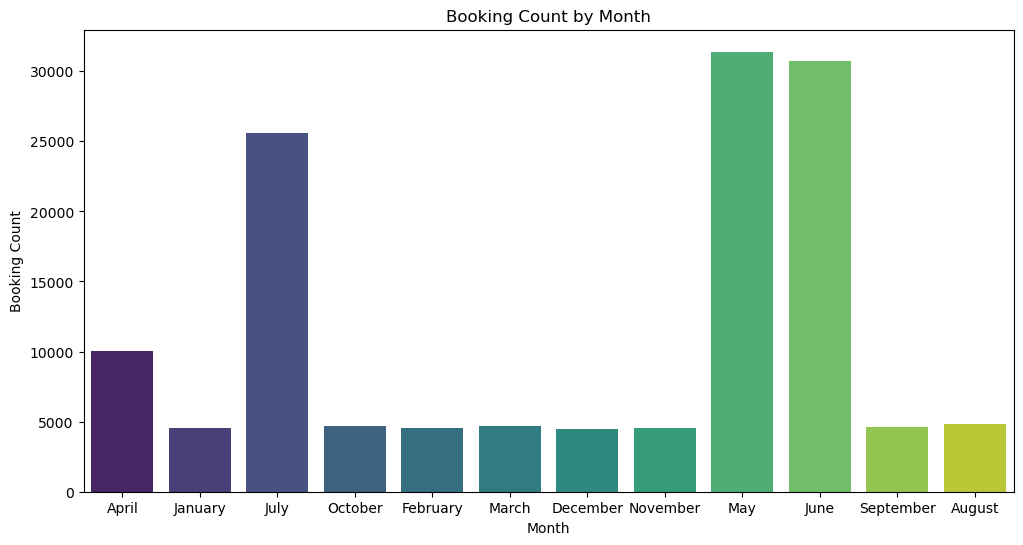

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(x=merged_data['booking_date'].dt.month_name(), palette='viridis')
plt.title('Booking Count by Month')
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.show()

## Weeks

In [94]:
merged_data['booking_date_week'] = merged_data['booking_date'].dt.week

C:\Users\Asus\AppData\Local\Temp\ipykernel_17612\948778747.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_data['booking_date_week'] = merged_data['booking_date'].dt.week


In [95]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,booking_date_month,booking_month_name,booking_date_week
0,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April,17
1,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,4,April,17
2,May012216558RT16,16558,2022-01-05,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,1,January,1
3,May012216558RT17,16558,2022-04-28,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April,17
4,May012216558RT18,16558,2022-04-26,2022-01-05,2022-03-05,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,4,April,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-01-08,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30
134569,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-03-08,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30
134570,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-02-08,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,7,July,30
134571,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-01-08,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30


In [96]:
merged_data['booking_date_week'].value_counts()

24    10095
20    10072
25    10001
21     9921
29     8551
28     6586
26     6035
30     5643
31     4811
27     4792
18     4715
40     4658
14     4653
1      4576
36     4567
49     4360
17     4247
22     4172
19     4112
44     3111
9      3066
23     2983
5      2940
6      1612
10     1599
45     1455
16      668
15      465
48       90
35       17
Name: booking_date_week, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_17612\3767536976.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.countplot(x=merged_data['booking_date'].dt.week, palette='viridis')


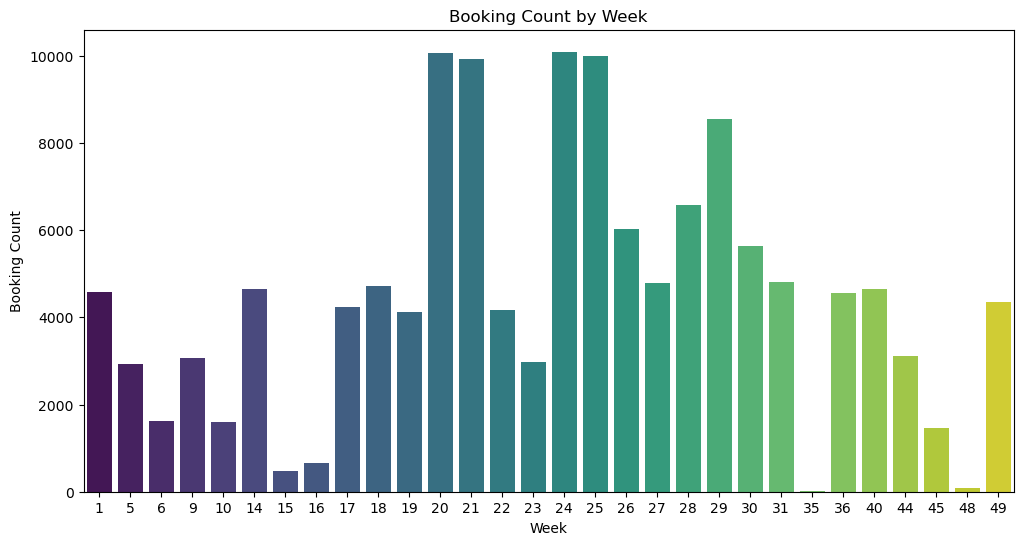

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(x=merged_data['booking_date'].dt.week, palette='viridis')
plt.title('Booking Count by Week')
plt.xlabel('Week')
plt.ylabel('Booking Count')
plt.show()

## platform

In [98]:
merged_data['booking_platform'].value_counts()

others            55061
makeyourtrip      26896
logtrip           14753
direct online     13374
tripster           9630
journey            8106
direct offline     6753
Name: booking_platform, dtype: int64

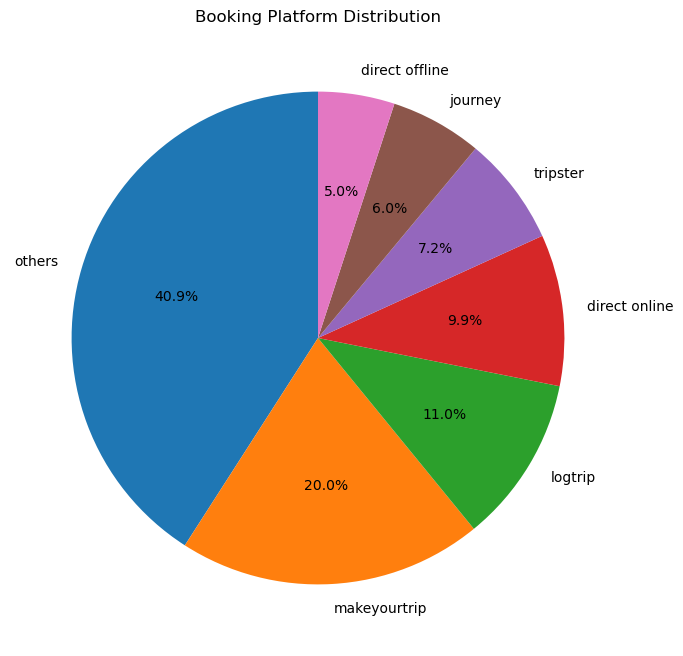

In [99]:
booking_platform_counts = merged_data['booking_platform'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(booking_platform_counts, labels=booking_platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Booking Platform Distribution')
plt.show()

In [100]:
aug_df= pd.read_csv(r"C:\Users\Asus\Downloads\Atliq Grand Hospitality\new_data_august.csv")

In [101]:
aug_df

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [102]:
merged_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,booking_date_month,booking_month_name,booking_date_week
0,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April,17
1,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,4,April,17
2,May012216558RT16,16558,2022-01-05,2022-01-05,2022-03-05,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,1,January,1
3,May012216558RT17,16558,2022-04-28,2022-01-05,2022-06-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,4,April,17
4,May012216558RT18,16558,2022-04-26,2022-01-05,2022-03-05,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,4,April,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-01-08,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30
134569,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-03-08,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30
134570,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-02-08,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,7,July,30
134571,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-01-08,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,7,July,30


In [103]:
merged_data.shape

(134573, 18)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17612\298465398.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='booking_date_week', y='revenue_realized', data=merged_data, estimator='sum', ci=None, marker='o', hue='booking_status')


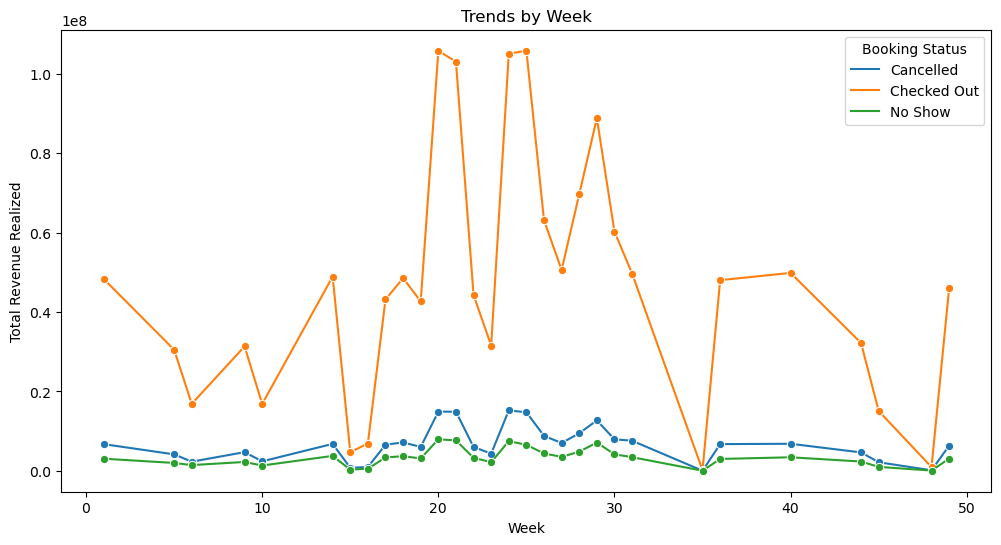

In [104]:
# Assuming 'merged_data' contains the relevant data
plt.figure(figsize=(12, 6))
sns.lineplot(x='booking_date_week', y='revenue_realized', data=merged_data, estimator='sum', ci=None, marker='o', hue='booking_status')
plt.title('Trends by Week')
plt.xlabel('Week')
plt.ylabel('Total Revenue Realized')
plt.legend(title='Booking Status')
plt.show()
